<a href="https://colab.research.google.com/github/auruj/SCT_ML_1/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import for file uploads in Colab
from google.colab import files

#  Upload the dataset
print("Please upload your dataset (e.g., train.csv):")
uploaded = files.upload()  # File upload prompt in Colab

#  Load the dataset
# Automatically detect uploaded file name
file_name = list(uploaded.keys())[0]
df = pd.read_csv('/content/train.csv')

#  Define features (X) and target (y)
feature_columns = ["GrLivArea", "FullBath", "BedroomAbvGr"]  # Example features
target_column = "SalePrice"

# Check if all required columns exist in the dataset
if not all(col in df.columns for col in feature_columns + [target_column]):
    raise ValueError("One or more specified columns are missing from the dataset.")

# Extract features and target
X = df[feature_columns]
y = df[target_column]

#  Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)











Please upload your dataset (e.g., train.csv):


Saving train.csv to train (3).csv


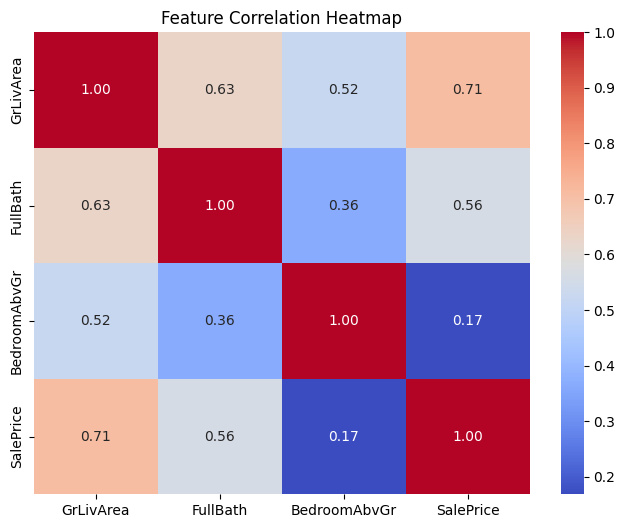

In [3]:
#  Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[feature_columns + [target_column]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


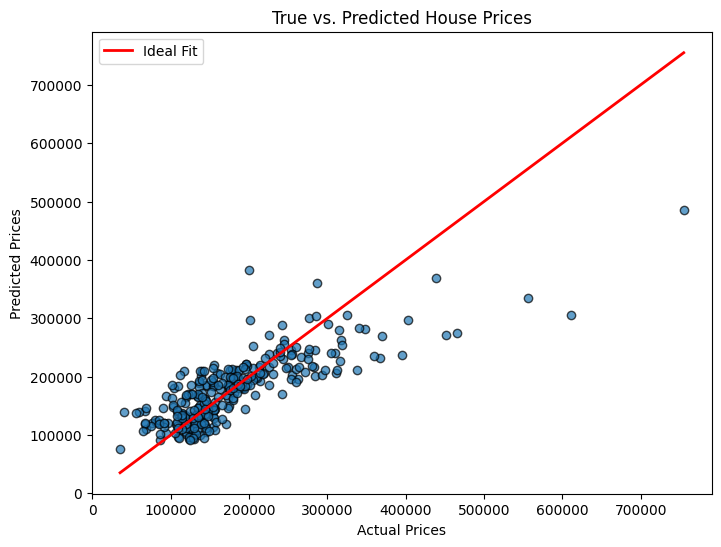

In [8]:
# True vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs. Predicted House Prices")
plt.legend()
plt.show()

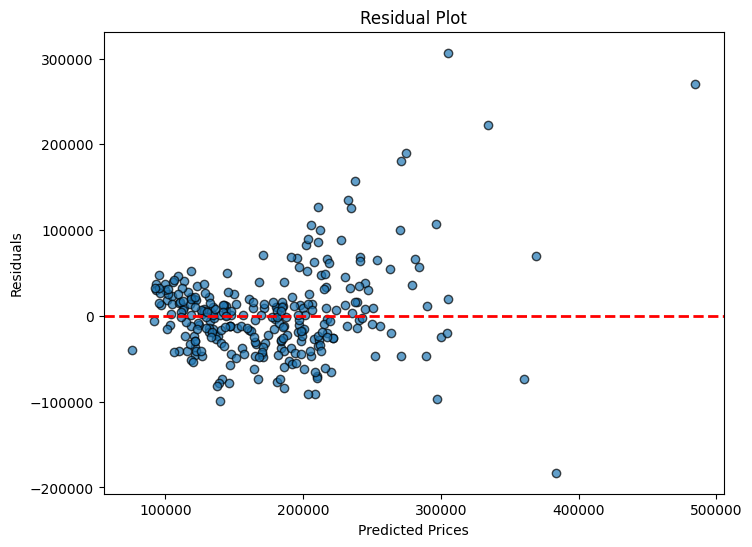

In [9]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [10]:
# Predict a new house price
# Example: 3200 sqft, 3 bathrooms, 4 bedrooms
new_house = [[3200, 3, 4]]
predicted_price = model.predict(new_house)
print(f"Predicted Price for the new house: ${predicted_price[0]:,.2f}")


Predicted Price for the new house: $368,568.24


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
